## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#print tensorflow version
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50
)

Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 4.1070 - accuracy: 0.3750 - val_loss: 7.3006 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 8.8321 - accuracy: 0.2969 - val_loss: 3.3462 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 3.6537 - accuracy: 0.3594 - val_loss: 5.4303 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 5s 3s/step - loss: 3.2609 - accuracy: 0.4219 - val_loss: 2.6906 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 5s 3s/step - loss: 2.5849 - accuracy: 0.4062 - val_loss: 3.5013 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 3.3092 - accuracy: 0.3906 - val_loss: 2.0298 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 5s 4s/step - loss: 1.3301 - accuracy: 0.4688 - val_loss: 2.3107 - val_accuracy: 0.4655
Epoch 8/50
2/2 [========================

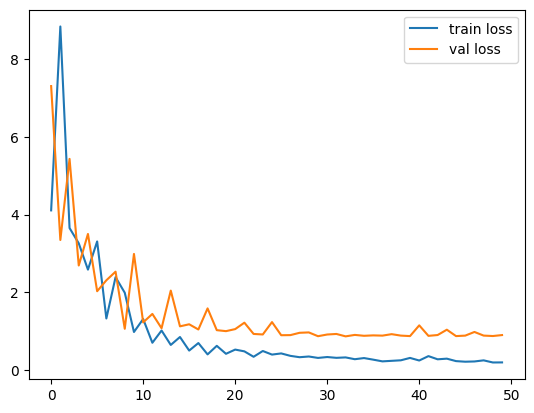

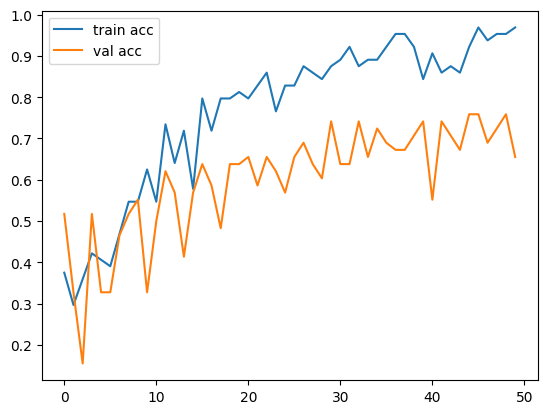

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\Users\Subhang Mokkarala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:

y_pred = model.predict(test_set)


2/2 [==============================] - 4s 1s/step


In [17]:
y_pred

array([[3.75989899e-02, 6.13040805e-01, 3.49360108e-01],
       [9.32573915e-01, 2.82245576e-02, 3.92014869e-02],
       [2.79083073e-01, 2.88370967e-01, 4.32545930e-01],
       [9.69045162e-01, 1.09908041e-02, 1.99639928e-02],
       [3.38036984e-01, 5.91339231e-01, 7.06238151e-02],
       [9.44767726e-06, 9.06980888e-04, 9.99083519e-01],
       [3.17051017e-04, 9.96021688e-01, 3.66136082e-03],
       [3.37578543e-02, 7.87750721e-01, 1.78491354e-01],
       [7.61701643e-01, 1.78247973e-01, 6.00504130e-02],
       [6.86494587e-03, 3.82281154e-01, 6.10853851e-01],
       [2.84724027e-01, 4.50204194e-01, 2.65071720e-01],
       [7.58213699e-02, 9.02637661e-01, 2.15410329e-02],
       [9.11994934e-01, 4.42510657e-02, 4.37539853e-02],
       [8.70544255e-01, 1.21499009e-01, 7.95675442e-03],
       [5.05463295e-02, 8.02350402e-01, 1.47103250e-01],
       [5.48980355e-01, 2.01807842e-01, 2.49211773e-01],
       [4.94284630e-02, 1.82901364e-04, 9.50388610e-01],
       [7.09906174e-03, 2.22354

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
# Load the pre-trained model
model = load_model("model_resnet50.h5")  # Replace with the actual path to your model file

# Load and preprocess the image
img = image.load_img(r"D:\University\Year 3 Sem 1\DNA\exp codes\Deep-Learning-Car-Brand-master\Deep-Learning-Car-Brand-master\Datasets\Train\lamborghini\2.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)

# Make predictions
preds = model.predict(x)
preds = np.argmax(preds, axis=1)

# Interpret the predictions
if preds == 0:
    preds_text = "The Car is Audi"
elif preds == 1:
    preds_text = "The Car is Lamborghini"
else:
    preds_text = "The Car is Mercedes"

print(preds_text)

1/1 [==============================] - 1s 1s/step
The Car is Lamborghini


In [24]:
x=image.img_to_array(img)
x

array([[[111., 100.,  72.],
        [111., 100.,  72.],
        [112., 100.,  74.],
        ...,
        [ 32.,  32.,  42.],
        [ 29.,  32.,  41.],
        [ 29.,  32.,  41.]],

       [[123., 111.,  89.],
        [122., 111.,  89.],
        [121., 110.,  90.],
        ...,
        [ 33.,  33.,  43.],
        [ 30.,  33.,  42.],
        [ 30.,  33.,  42.]],

       [[123., 111.,  89.],
        [122., 111.,  89.],
        [121., 110.,  90.],
        ...,
        [ 33.,  33.,  43.],
        [ 30.,  33.,  42.],
        [ 30.,  33.,  42.]],

       ...,

       [[ 61.,  69.,  88.],
        [ 64.,  72.,  91.],
        [ 62.,  70.,  89.],
        ...,
        [ 40.,  40.,  38.],
        [ 39.,  39.,  37.],
        [ 39.,  39.,  37.]],

       [[ 61.,  69.,  88.],
        [ 64.,  72.,  91.],
        [ 62.,  70.,  89.],
        ...,
        [ 40.,  40.,  38.],
        [ 39.,  39.,  37.],
        [ 39.,  39.,  37.]],

       [[ 59.,  67.,  86.],
        [ 59.,  67.,  86.],
        [ 58.,  

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 [==============================] - 0s 124ms/step


array([[6.4329193e-03, 3.8177357e-04, 9.9318528e-01]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 123ms/step


In [30]:
a==1

array([False])

In [ ]:
#print image from prediction 